<h1>Twitter Text Report: Worlds 2021</h1>


<h3>Alex Baumgartner</h3>
<h4>10/20/20201</h4>
The League of Legends World Finals tournament is currently going on. As an avid player and viewer, I thought it would be interesting to parse some twitter data surrounding the North Americans teams that made it to the Worlds tournament. Those teams for this year are Cloud 9, 100 Thieves, and Team Liquid. After the groups stage has been completed, only Cloud 9 has moved on. Because of this, I predict that Cloud 9 will receive the most positive tweets from among the 3 teams. 

In [148]:
import requests
import pandas as pd
import urllib
import json
import matplotlib

In [ ]:
ls

In [3]:
bearer_token = pd.read_csv('Twitter_Bearer.txt', header = 0)

In [ ]:
bearer_token['Bearer_Token'].iloc[0]

In [5]:
header = {'Authorization' : 'Bearer {}'.format(bearer_token['Bearer_Token'].iloc[0])}

In [6]:
bearer_token.keys()

Index(['Bearer_Token'], dtype='object')

In [7]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

In [8]:
endpoint_url

'https://api.twitter.com/2/tweets/search/recent'

In [9]:
query = urllib.parse.quote('(#C9WIN OR #TLWIN OR #100WIN) lang:en')

For my query, I wanted to find tweets using hashtags for the 3 North American teams that made it to Worlds. 

In [10]:
tweet_fields = 'public_metrics,created_at,author_id,lang,in_reply_to_user_id'

In [11]:
my_api_url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [12]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%23C9WIN%20OR%20%23TLWIN%20OR%20%23100WIN%29%20lang%3Aen&tweet.fields=public_metrics,created_at,author_id,lang,in_reply_to_user_id'

I decided to check if the tweets found were in reply to one another as well as the required fields. This can help show any conversations surrounding the teams, which can be interesting to look at and can help when gauging public response to the 3 teams.

In [13]:
expansions = 'author_id'

In [14]:
url = endpoint_url + '?query={}&max_results=100&tweet.fields={}'.format(query, tweet_fields)

In [15]:
url_expansions = endpoint_url + '?query={}&max_results=100&tweet.fields={}&expansions={}'.format(query, tweet_fields, expansions)

In [16]:
url_expansions

'https://api.twitter.com/2/tweets/search/recent?query=%28%23C9WIN%20OR%20%23TLWIN%20OR%20%23100WIN%29%20lang%3Aen&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang,in_reply_to_user_id&expansions=author_id'

In [17]:
response_1 = requests.request("GET", url_expansions, headers = header)

In [18]:
response_1.text

'{"data":[{"id":"1450980040536215552","created_at":"2021-10-21T00:19:34.000Z","in_reply_to_user_id":"1452520626","author_id":"1403794489177673731","text":"@Cloud9 I doubted c9 once but never again. I\'m all in on it baby let\'s go #c9win","public_metrics":{"retweet_count":0,"reply_count":0,"like_count":0,"quote_count":0},"lang":"en"},{"id":"1450978144886812672","created_at":"2021-10-21T00:12:02.000Z","author_id":"1376175996852785154","text":"Looking for a professional Invoice? For more visit the Link: https://t.co/bwmAiFw5V5\\n\\nhttps://t.co/bwmAiFw5V5\\n#CSKvsKKR \\n#IPLFinal \\n#Adele \\n#Adele30 \\n#EasyOnMe \\n#AnimalCrossing \\n#ACNH  \\n#NintendoDirect \\n#JUNGKOOK  \\n#Giants \\n#Dodgers  \\n#OUTNOW \\n#C9WIN \\nhttps://t.co/bwmAiFw5V5 https://t.co/aZHK2iPL1f","public_metrics":{"retweet_count":0,"reply_count":0,"like_count":0,"quote_count":0},"lang":"en"},{"id":"1450971352970801156","created_at":"2021-10-20T23:45:02.000Z","in_reply_to_user_id":"1452520626","author_id":"61246385

In [19]:
response_1_dict = json.loads(response_1.text)

In [20]:
response_1_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [194]:
response_1_dict['data'][0]['text']

"@Cloud9 I doubted c9 once but never again. I'm all in on it baby let's go #c9win"

In [22]:
my_df = pd.DataFrame(response_1_dict['data'])

In [23]:
my_df

,id,created_at,in_reply_to_user_id,author_id,text,public_metrics,lang
0,1450980040536215552,2021-10-21T00:19:34.000Z,1452520626,1403794489177673731,@Cloud9 I doubted c9 once but never again. I'm...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
1,1450978144886812672,2021-10-21T00:12:02.000Z,NaN,1376175996852785154,Looking for a professional Invoice? For more v...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
2,1450971352970801156,2021-10-20T23:45:02.000Z,1452520626,612463851,"@Cloud9 Not I, for I am hoping and praying for...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
3,1450963657215647749,2021-10-20T23:14:28.000Z,1452520626,602386138,@Cloud9 Gen.g when u win &lt;3 #c9win,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
4,1450960114928730124,2021-10-20T23:00:23.000Z,NaN,770305614,Lost a bet against my fiancé during the #LCS S...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
...,...,...,...,...,...,...,...
95,1450488151550668804,2021-10-19T15:44:58.000Z,NaN,1070160693804986368,"Wow, #C9WIN couldn’t have gotten a better knoc...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
96,1450487345174753280,2021-10-19T15:41:46.000Z,NaN,1388253827690909696,"RT @TheuzinFN: "" header for @blxckoutz "" \n\n@...","{'retweet_count': 19, 'reply_count': 0, 'like_...",en
97,1450481553335853056,2021-10-19T15:18:45.000Z,NaN,1365053526,RT @AzaelOfficial: CLOUD9 GET GEN.G LET'S FUCK...,"{'retweet_count': 62, 'reply_count': 0, 'like_...",en
98,1450478771966988296,2021-10-19T15:07:42.000Z,NaN,1250880776805195776,"RT @TheuzinFN: "" header for @blxckoutz "" \n\n@...","{'retweet_count': 19, 'reply_count': 0, 'like_...",en


In [24]:
my_df.to_csv('twitter_data.csv')

In [25]:
response_1_dict['meta']

{'newest_id': '1450980040536215552',
 'oldest_id': '1450478562528669705',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpdv5sihd2rglt75hlrecyrivgemil'}

In [26]:
url_2 = url_expansions + '&next_token={}'.format(response_1_dict['meta']['next_token'])

In [27]:
url_2

'https://api.twitter.com/2/tweets/search/recent?query=%28%23C9WIN%20OR%20%23TLWIN%20OR%20%23100WIN%29%20lang%3Aen&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang,in_reply_to_user_id&expansions=author_id&next_token=b26v89c19zqg8o3fpdv5sihd2rglt75hlrecyrivgemil'

In [28]:
response_2 = requests.request("GET", url_2, headers = header)

In [29]:
response_2.text

'{"data":[{"text":"RT @Cloud9: We heard the call.\\n\\nOnce again. #C9WIN https://t.co/S2YmPNiKjw","lang":"en","id":"1450478315257671694","author_id":"942213299323760640","public_metrics":{"retweet_count":568,"reply_count":0,"like_count":0,"quote_count":0},"created_at":"2021-10-19T15:05:53.000Z"},{"text":"RT @TheuzinFN: \\" header for @blxckoutz \\" \\n\\n@Cloud9 #C9WIN \\n\\nall support is appreciated. https://t.co/UxtFoQo96X","lang":"en","id":"1450477927846584327","author_id":"1395790806208892933","public_metrics":{"retweet_count":19,"reply_count":0,"like_count":0,"quote_count":0},"created_at":"2021-10-19T15:04:21.000Z"},{"text":"RT @TheuzinFN: \\" header for @blxckoutz \\" \\n\\n@Cloud9 #C9WIN \\n\\nall support is appreciated. https://t.co/UxtFoQo96X","lang":"en","id":"1450477499692036103","author_id":"1399482313017286657","public_metrics":{"retweet_count":19,"reply_count":0,"like_count":0,"quote_count":0},"created_at":"2021-10-19T15:02:39.000Z"},{"text":"RT @TheuzinFN: \\" header f

In [30]:
response_2_dict = json.loads(response_2.text)

In [31]:
my_df2 = pd.DataFrame(response_2_dict['data'])

In [32]:
my_df2

,text,lang,id,author_id,public_metrics,created_at,in_reply_to_user_id
0,RT @Cloud9: We heard the call.\n\nOnce again. ...,en,1450478315257671694,942213299323760640,"{'retweet_count': 568, 'reply_count': 0, 'like...",2021-10-19T15:05:53.000Z,NaN
1,"RT @TheuzinFN: "" header for @blxckoutz "" \n\n@...",en,1450477927846584327,1395790806208892933,"{'retweet_count': 19, 'reply_count': 0, 'like_...",2021-10-19T15:04:21.000Z,NaN
2,"RT @TheuzinFN: "" header for @blxckoutz "" \n\n@...",en,1450477499692036103,1399482313017286657,"{'retweet_count': 19, 'reply_count': 0, 'like_...",2021-10-19T15:02:39.000Z,NaN
3,"RT @TheuzinFN: "" header for @blxckoutz "" \n\n@...",en,1450477277339398145,1385087813864017925,"{'retweet_count': 19, 'reply_count': 0, 'like_...",2021-10-19T15:01:46.000Z,NaN
4,RT @Cloud9: See you in the #Worlds2021 Finals ...,en,1450477036384968705,448357975,"{'retweet_count': 103, 'reply_count': 0, 'like...",2021-10-19T15:00:48.000Z,NaN
...,...,...,...,...,...,...,...
94,RT @LCSOfficial: Quarterfinals #C9WIN | #World...,en,1450309840069406721,3517083197,"{'retweet_count': 42, 'reply_count': 0, 'like_...",2021-10-19T03:56:25.000Z,NaN
95,RT @LosersQueuePod: 4 WAY TIE GROUP D LETS GOO...,en,1450308295718318088,1019362363286355974,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2021-10-19T03:50:17.000Z,NaN
96,RT @LCSOfficial: Quarterfinals #C9WIN | #World...,en,1450307060726370308,1151851094873653248,"{'retweet_count': 42, 'reply_count': 0, 'like_...",2021-10-19T03:45:23.000Z,NaN
97,RT @Cloud9: We heard the call.\n\nOnce again. ...,en,1450304510069559296,1329101830509432833,"{'retweet_count': 568, 'reply_count': 0, 'like...",2021-10-19T03:35:15.000Z,NaN


In [33]:
response_2_dict['meta']

{'newest_id': '1450478315257671694',
 'oldest_id': '1450304272776802306',
 'result_count': 99,
 'next_token': 'b26v89c19zqg8o3fpdv5sgaj8cqvze7fzr17b7mzjko71'}

In [34]:
url_3 = url_expansions + '&next_token={}'.format(response_2_dict['meta']['next_token'])

In [35]:
url_3

'https://api.twitter.com/2/tweets/search/recent?query=%28%23C9WIN%20OR%20%23TLWIN%20OR%20%23100WIN%29%20lang%3Aen&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang,in_reply_to_user_id&expansions=author_id&next_token=b26v89c19zqg8o3fpdv5sgaj8cqvze7fzr17b7mzjko71'

In [36]:
response_3 = requests.request("GET", url_3, headers = header)

In [37]:
response_3.text

'{"data":[{"lang":"en","text":"RT @Cloud9: Today summarized:\\n\\nLCS &gt; LCK &gt; LPL \\n\\nBRING THE 4-WAY-TIE \\uD83D\\uDDE3️ #Worlds2021 #TLWIN","public_metrics":{"retweet_count":69,"reply_count":0,"like_count":0,"quote_count":0},"id":"1450303483249188865","created_at":"2021-10-19T03:31:10.000Z","author_id":"974494140783214593"},{"lang":"en","text":"RT @LCSOfficial: Quarterfinals #C9WIN | #Worlds20221 https://t.co/giQQbAr48s","public_metrics":{"retweet_count":42,"reply_count":0,"like_count":0,"quote_count":0},"id":"1450303417415520262","created_at":"2021-10-19T03:30:54.000Z","author_id":"2416433815"},{"lang":"en","text":"RT @AzaelOfficial: CLOUD9 GET GEN.G LET\'S FUCKING GOOOOOO!\\n\\nREVENGE FOR TL, C9 ABOUT TO KILL LCK &amp; MAKE SEMI\'S AGAIN!\\n\\nI BELIVEEEEEE!!!! #C…","public_metrics":{"retweet_count":62,"reply_count":0,"like_count":0,"quote_count":0},"id":"1450302931463327746","created_at":"2021-10-19T03:28:58.000Z","author_id":"3036852366"},{"lang":"en","text":"RT @Cloud9:

In [38]:
response_3_dict = json.loads(response_3.text)

In [39]:
my_df3 = pd.DataFrame(response_3_dict['data'])

In [40]:
my_df3

,lang,text,public_metrics,id,created_at,author_id,in_reply_to_user_id
0,en,RT @Cloud9: Today summarized:\n\nLCS &gt; LCK ...,"{'retweet_count': 69, 'reply_count': 0, 'like_...",1450303483249188865,2021-10-19T03:31:10.000Z,974494140783214593,NaN
1,en,RT @LCSOfficial: Quarterfinals #C9WIN | #World...,"{'retweet_count': 42, 'reply_count': 0, 'like_...",1450303417415520262,2021-10-19T03:30:54.000Z,2416433815,NaN
2,en,RT @AzaelOfficial: CLOUD9 GET GEN.G LET'S FUCK...,"{'retweet_count': 62, 'reply_count': 0, 'like_...",1450302931463327746,2021-10-19T03:28:58.000Z,3036852366,NaN
3,en,RT @Cloud9: We heard the call.\n\nOnce again. ...,"{'retweet_count': 568, 'reply_count': 0, 'like...",1450302769382912000,2021-10-19T03:28:20.000Z,1046146612785950720,NaN
4,en,"RT @LCSOfficial: ""And this one is for the cham...","{'retweet_count': 1276, 'reply_count': 0, 'lik...",1450302766212079620,2021-10-19T03:28:19.000Z,759956701,NaN
...,...,...,...,...,...,...,...
95,en,RT @TeamLiquidLoL: LCK broadcast diff #TLWIN #...,"{'retweet_count': 55, 'reply_count': 0, 'like_...",1450244474173526020,2021-10-18T23:36:41.000Z,868685008151740417,NaN
96,en,RT @TeamLiquidLoL: Together We Rise. #TLWIN \n...,"{'retweet_count': 29, 'reply_count': 0, 'like_...",1450244186746273800,2021-10-18T23:35:33.000Z,868685008151740417,NaN
97,en,@lolesports Script is ready but don't tell any...,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",1450244099735445515,2021-10-18T23:35:12.000Z,4079322316,614754689
98,en,RT @Cloud9: We heard the call.\n\nOnce again. ...,"{'retweet_count': 568, 'reply_count': 0, 'like...",1450243848039370753,2021-10-18T23:34:12.000Z,700310622,NaN


To wrangle my data I created 3 data frames, each with 100 tweets, and then made them into an array. I then concatenated the 3 data frames together. 

In [41]:
frames = [my_df, my_df2, my_df3]

In [42]:
combined_dfs = pd.concat(frames)

In [43]:
combined_dfs.groupby('in_reply_to_user_id').count().sort_values('text', ascending = False)

,id,created_at,author_id,text,public_metrics,lang
in_reply_to_user_id,,,,,,
964529942,6,6,6,6,6,6
1452520626,4,4,4,4,4,4
614754689,4,4,4,4,4,4
575352314,2,2,2,2,2,2
951370993439719424,2,2,2,2,2,2
1076110847947300865,1,1,1,1,1,1
1152301380121649152,1,1,1,1,1,1
1290587544330043394,1,1,1,1,1,1
1648029396,1,1,1,1,1,1


In [44]:
type(combined_dfs['text'])

pandas.core.series.Series

This is my combined data frame, showing all 300 tweets. This data frame, however, does not really tell us much. To really analyze this data, I will need to count the tweets that contain each of the 3 hashtags that I searched for. To do this, I need to sort the tweets by if they include each hashtag, and count them all.

In [53]:
combined_dfs.sort_values(by=["text"])

,id,created_at,in_reply_to_user_id,author_id,text,public_metrics,lang
5,1450476837721804808,2021-10-19T15:00:01.000Z,NaN,1007039025675456514,""" header for @blxckoutz "" \n\n@Cloud9 #C9WIN \...","{'retweet_count': 19, 'reply_count': 20, 'like...",en
87,1450498645225185284,2021-10-19T16:26:40.000Z,NaN,2370350274,#C9WIN Let it go! https://t.co/KQWSgmPkXf,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
46,1450407564282372096,2021-10-19T10:24:45.000Z,NaN,1065923083696054274,#LeagueOfLegends Head Coach for @cloud9 @mithy...,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",en
74,1450351433266581507,2021-10-19T06:41:42.000Z,NaN,1429149771931942913,#Worlds2021 #C9WIN So excited for the last few...,"{'retweet_count': 14, 'reply_count': 1, 'like_...",en
56,1450384704474124291,2021-10-19T08:53:55.000Z,NaN,1065923083696054274,#Worlds2021 Quarterfinals-Bracket!\n\nWho's go...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
...,...,...,...,...,...,...,...
76,1450514013717254146,2021-10-19T17:27:44.000Z,NaN,439747613,You’re NA’s last hope @Cloud9. I believe in th...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
22,1450285970977296390,2021-10-19T02:21:35.000Z,NaN,1008284215421440000,been a solid ride considering everything that ...,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",en
26,1450281528143974400,2021-10-19T02:03:55.000Z,NaN,1295921559794638854,id have to consume a lot of hopium for the res...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",en
65,1450258277359566848,2021-10-19T00:31:32.000Z,NaN,782751902488530945,it's time to train new stuffs #C9WIN https://t...,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",en


In [54]:
combined_dfs.to_csv('full_twitter_data.csv')

In [55]:
combined_dfs.groupby('author_id').count().sort_values('author_id', ascending = False)

,id,created_at,in_reply_to_user_id,text,public_metrics,lang
author_id,,,,,,
995882911,1,1,0,1,1,1
990125779,1,1,0,1,1,1
981928962,1,1,0,1,1,1
976777185884176384,1,1,0,1,1,1
974494140783214593,3,3,0,3,3,3
...,...,...,...,...,...,...
1019362363286355974,1,1,0,1,1,1
1012552501,1,1,0,1,1,1
1008284215421440000,1,1,0,1,1,1


In [196]:
type(combined_dfs['text'])

pandas.core.series.Series

This was the hardest part of this project. It took lots of searching around and fumbling about to find a way to target the text of the tweets only. I found out that it was listed as a series, and was able to use str.findall to check which tweets contained the hashtags. From there, I created three data frames, each one declaring if the hashtag was present or if there was none.

In [88]:
C9_WIN = combined_dfs['text'].str.findall('C9WIN').to_list()
C9_WIN_df = pd.DataFrame(C9_WIN)

In [89]:
TL_WIN = combined_dfs['text'].str.findall('TLWIN').to_list()
TL_WIN_df = pd.DataFrame(TL_WIN)

In [198]:
TL_WIN_df

,0
0,None
1,None
2,None
3,None
4,TLWIN
...,...
294,TLWIN
295,TLWIN
296,None
297,None


In [91]:
hun_WIN = combined_dfs['text'].str.findall('100WIN').to_list()
hun_WIN_df = pd.DataFrame(hun_WIN)

From these 3 data frames, I created one larger data frame using only the relevant columns.

In [199]:
Hashtag_df = pd.DataFrame(
{'#C9WIN': C9_WIN_df[0],
 '#TLWIN': TL_WIN_df[0],
 '#100WIN': hun_WIN_df[0]}
)

In [200]:
Hashtag_df

,#C9WIN,#TLWIN,#100WIN
0,None,None,None
1,C9WIN,None,None
2,None,None,None
3,None,None,None
4,None,TLWIN,None
...,...,...,...
294,None,TLWIN,None
295,None,TLWIN,None
296,C9WIN,None,None
297,C9WIN,None,None


After I had the combined data frame, I looked at the sum of each relevant value in the columns, and created a final data frame. Using the sum was necessary to translate the text values into numerical values, which I could then graph below.

In [133]:
C9_Count = (Hashtag_df == 'C9WIN').sum()
TL_Count = (Hashtag_df == 'TLWIN').sum()
HUN_Count = (Hashtag_df == '100WIN').sum()

In [144]:
Count_df = pd.DataFrame(
{'#C9WIN': C9_Count[0],
 '#TLWIN': TL_Count[1],
 '#100WIN': HUN_Count[2]
}, index=[0]
)

<h2>Visualization of Query</h2>

<AxesSubplot:xlabel='Hashtag', ylabel='Frequency of Hashtag'>

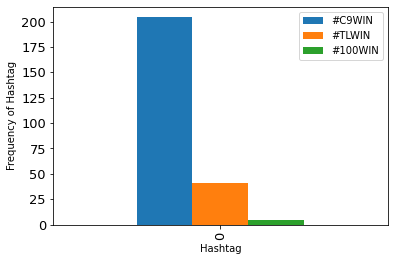

In [193]:
Count_df.plot.bar(ylabel='Frequency of Hashtag', xlabel='Hashtag', fontsize=(13), figsize=(6, 4))

This is the final visualization of my query, showing the frequency of each hashtag from the tweets that I collected. I will say, this data is not conclusive in any way, and is not a perfect representation of the data. I do not know why #100WIN is so low in comparison to the other two. Additionally, these hashtags are not only used in support of the League of Legends teams, which is what I am interested in. These hashtags are used by the organizations across all of their teams as well, making this data somewhat unreliable. This data does make sense however. Cloud 9 was the only team to make it to the playoffs stage of the tournament, so it makes sense that they would have the most support, especially since they have become a source of hope for most North American fans, as they are the last representative we have.

In [165]:
response_1_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [166]:
response_1_dict['includes']

{'users': [{'id': '1403794489177673731',
   'name': 'TheMightyBaloon',
   'username': 'TheMightyBaloon'},
  {'id': '1376175996852785154',
   'name': 'Graphic Upshot',
   'username': 'graphic_upshot'},
  {'id': '612463851', 'name': 'Andrew Norris', 'username': 'JudgeArcadia'},
  {'id': '602386138',
   'name': 'Ronald #Resistencia',
   'username': 'EsteNoEsRonald'},
  {'id': '770305614', 'name': 'Cy Ver', 'username': 'cycythepanda'},
  {'id': '1325497376388370433', 'name': 'guy', 'username': 'sujiRedsun'},
  {'id': '933492426', 'name': 'TSM FTX Ari', 'username': 'AriYairRP'},
  {'id': '899998653380673536',
   'name': '🐯lea030408(cye)',
   'username': '_deus_vult__'},
  {'id': '1458665886', 'name': 'Instinct✌🏾🎃', 'username': 'Instinct_FPS'},
  {'id': '545294160', 'name': 'Jay', 'username': 'JaylinkNA'},
  {'id': '1441074497340117000',
   'name': 'AAAAAAAAAHHHHHHHHHH',
   'username': 'C9atWorlds'},
  {'id': '1344432278353698817',
   'name': 'vinny | NAmen',
   'username': 'shieldedistaken'

In [167]:
user_info = pd.DataFrame(response_1_dict['includes']['users'])

In [168]:
user_info2 = pd.DataFrame(response_2_dict['includes']['users'])

In [169]:
user_info3 = pd.DataFrame(response_3_dict['includes']['users'])

In [170]:
user_info_array = [user_info,user_info2,user_info3]

In [171]:
combined_user_info = pd.concat(user_info_array)

In [175]:
user_name = combined_user_info['name']

In [176]:
user_name

0                  TheMightyBaloon
1                   Graphic Upshot
2                    Andrew Norris
3              Ronald #Resistencia
4                           Cy Ver
                  ...             
85                          micah.
86                 armandoportilho
87                              Jo
88    Ranking in Doubles(pkmn) 👋🏻👀
89                          Colfax
Name: name, Length: 282, dtype: object

In [177]:
combined_user_info.sort_values('id', ascending = False)

,id,name,username
61,995882911,Clarence Storm/Jalen,AgentJalen18
42,990125779,Jake,thebulld0zer
60,981928962,Big G fan,Brewer90M
76,976777185884176384,krazy popet,notseraphs
0,974494140783214593,grizz233,grizz2331
...,...,...,...
91,1019362363286355974,Dan,Windowshadow69
66,1012552501,eRa Dalaqua,joaodalaqua
20,1008284215421440000,da,alcaraz_daryl
5,1007039025675456514,Tzn,TheuzinFN


This is the combined dataframe with all of the names and usernames of the collected tweets. Here is where I am having some troubles with my code. I have all the names and usernames of the tweets, but I cannot link them up with the other data frame. I think this is partially due to the difference in number of rows. I do not know why the number of rows are different. When I try to add the names as another row to the main dataframe, I get an error about duplicate axis

In [178]:
combined_user_info.groupby('id').count().sort_values('id', ascending = False)

,name,username
id,,
995882911,1,1
990125779,1,1
981928962,1,1
976777185884176384,1,1
974494140783214593,1,1
...,...,...
1019362363286355974,1,1
1012552501,1,1
1008284215421440000,1,1


In [179]:
user_info.groupby('id').count().sort_values('id', ascending = False)

,name,username
id,,
955970677,1,1
940631444669440000,1,1
933492426,1,1
919495234991427584,1,1
907074598574858241,1,1
...,...,...
1066867383061630976,1,1
1058102479567482880,1,1
1039511865980870656,1,1
